Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.
Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.duplicated().sum()

0

#INSIGHTS 
Glucose	BloodPressure	SkinThickness	Insulin	BMI	 ARE  ZEROES

In [6]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()
#no Null Values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='BloodPressure', ylabel='Count'>

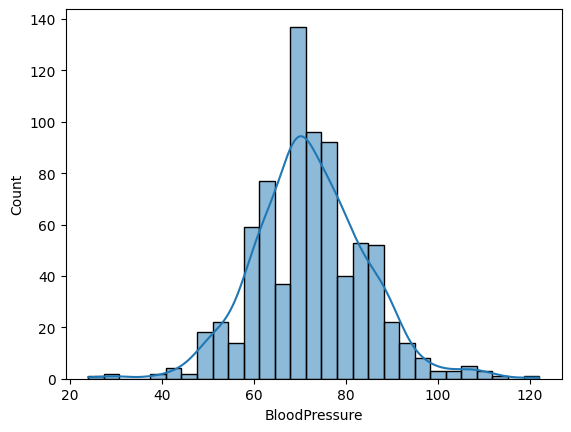

In [11]:
import seaborn as sns
sns.histplot(df['BloodPressure'],kde=True)
# there ppl more between 20-40

<Axes: xlabel='Glucose', ylabel='Count'>

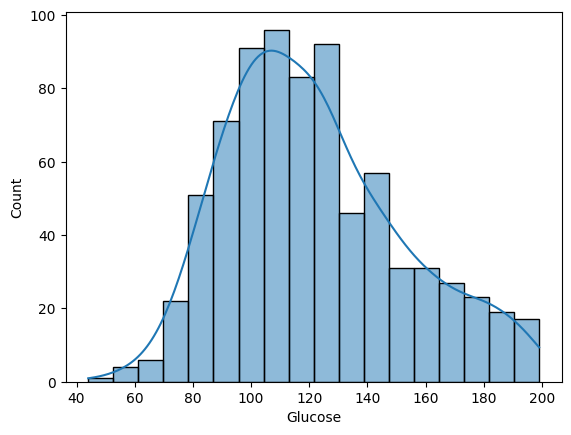

In [17]:
sns.histplot(df['Glucose'],kde=True)

<Axes: xlabel='SkinThickness', ylabel='Count'>

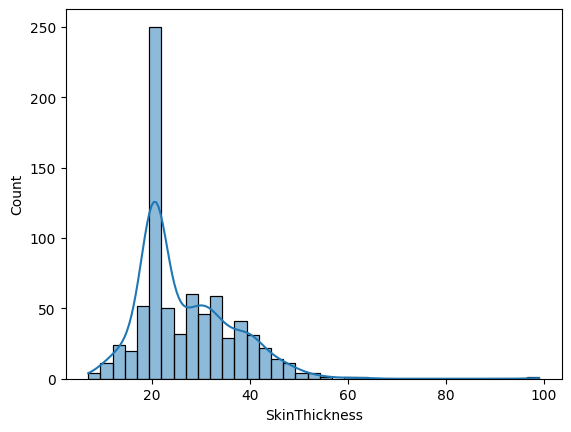

In [18]:
sns.histplot(df['SkinThickness'],kde=True)

<Axes: xlabel='BMI', ylabel='Count'>

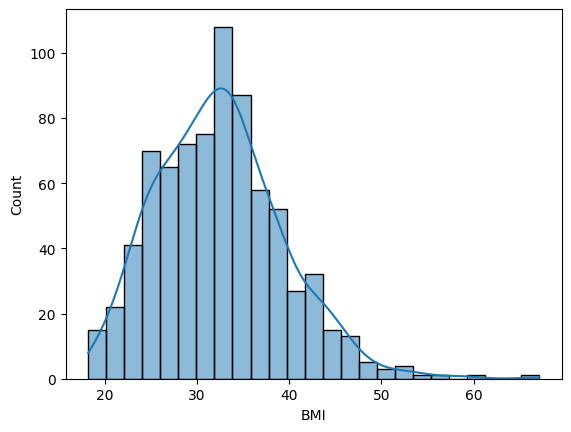

In [19]:
sns.histplot(df['BMI'],kde=True)

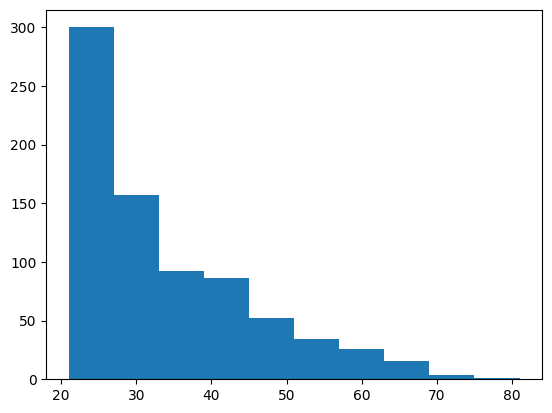

In [15]:
import matplotlib.pyplot as plt
plt.hist(df['Age'])
plt.show()

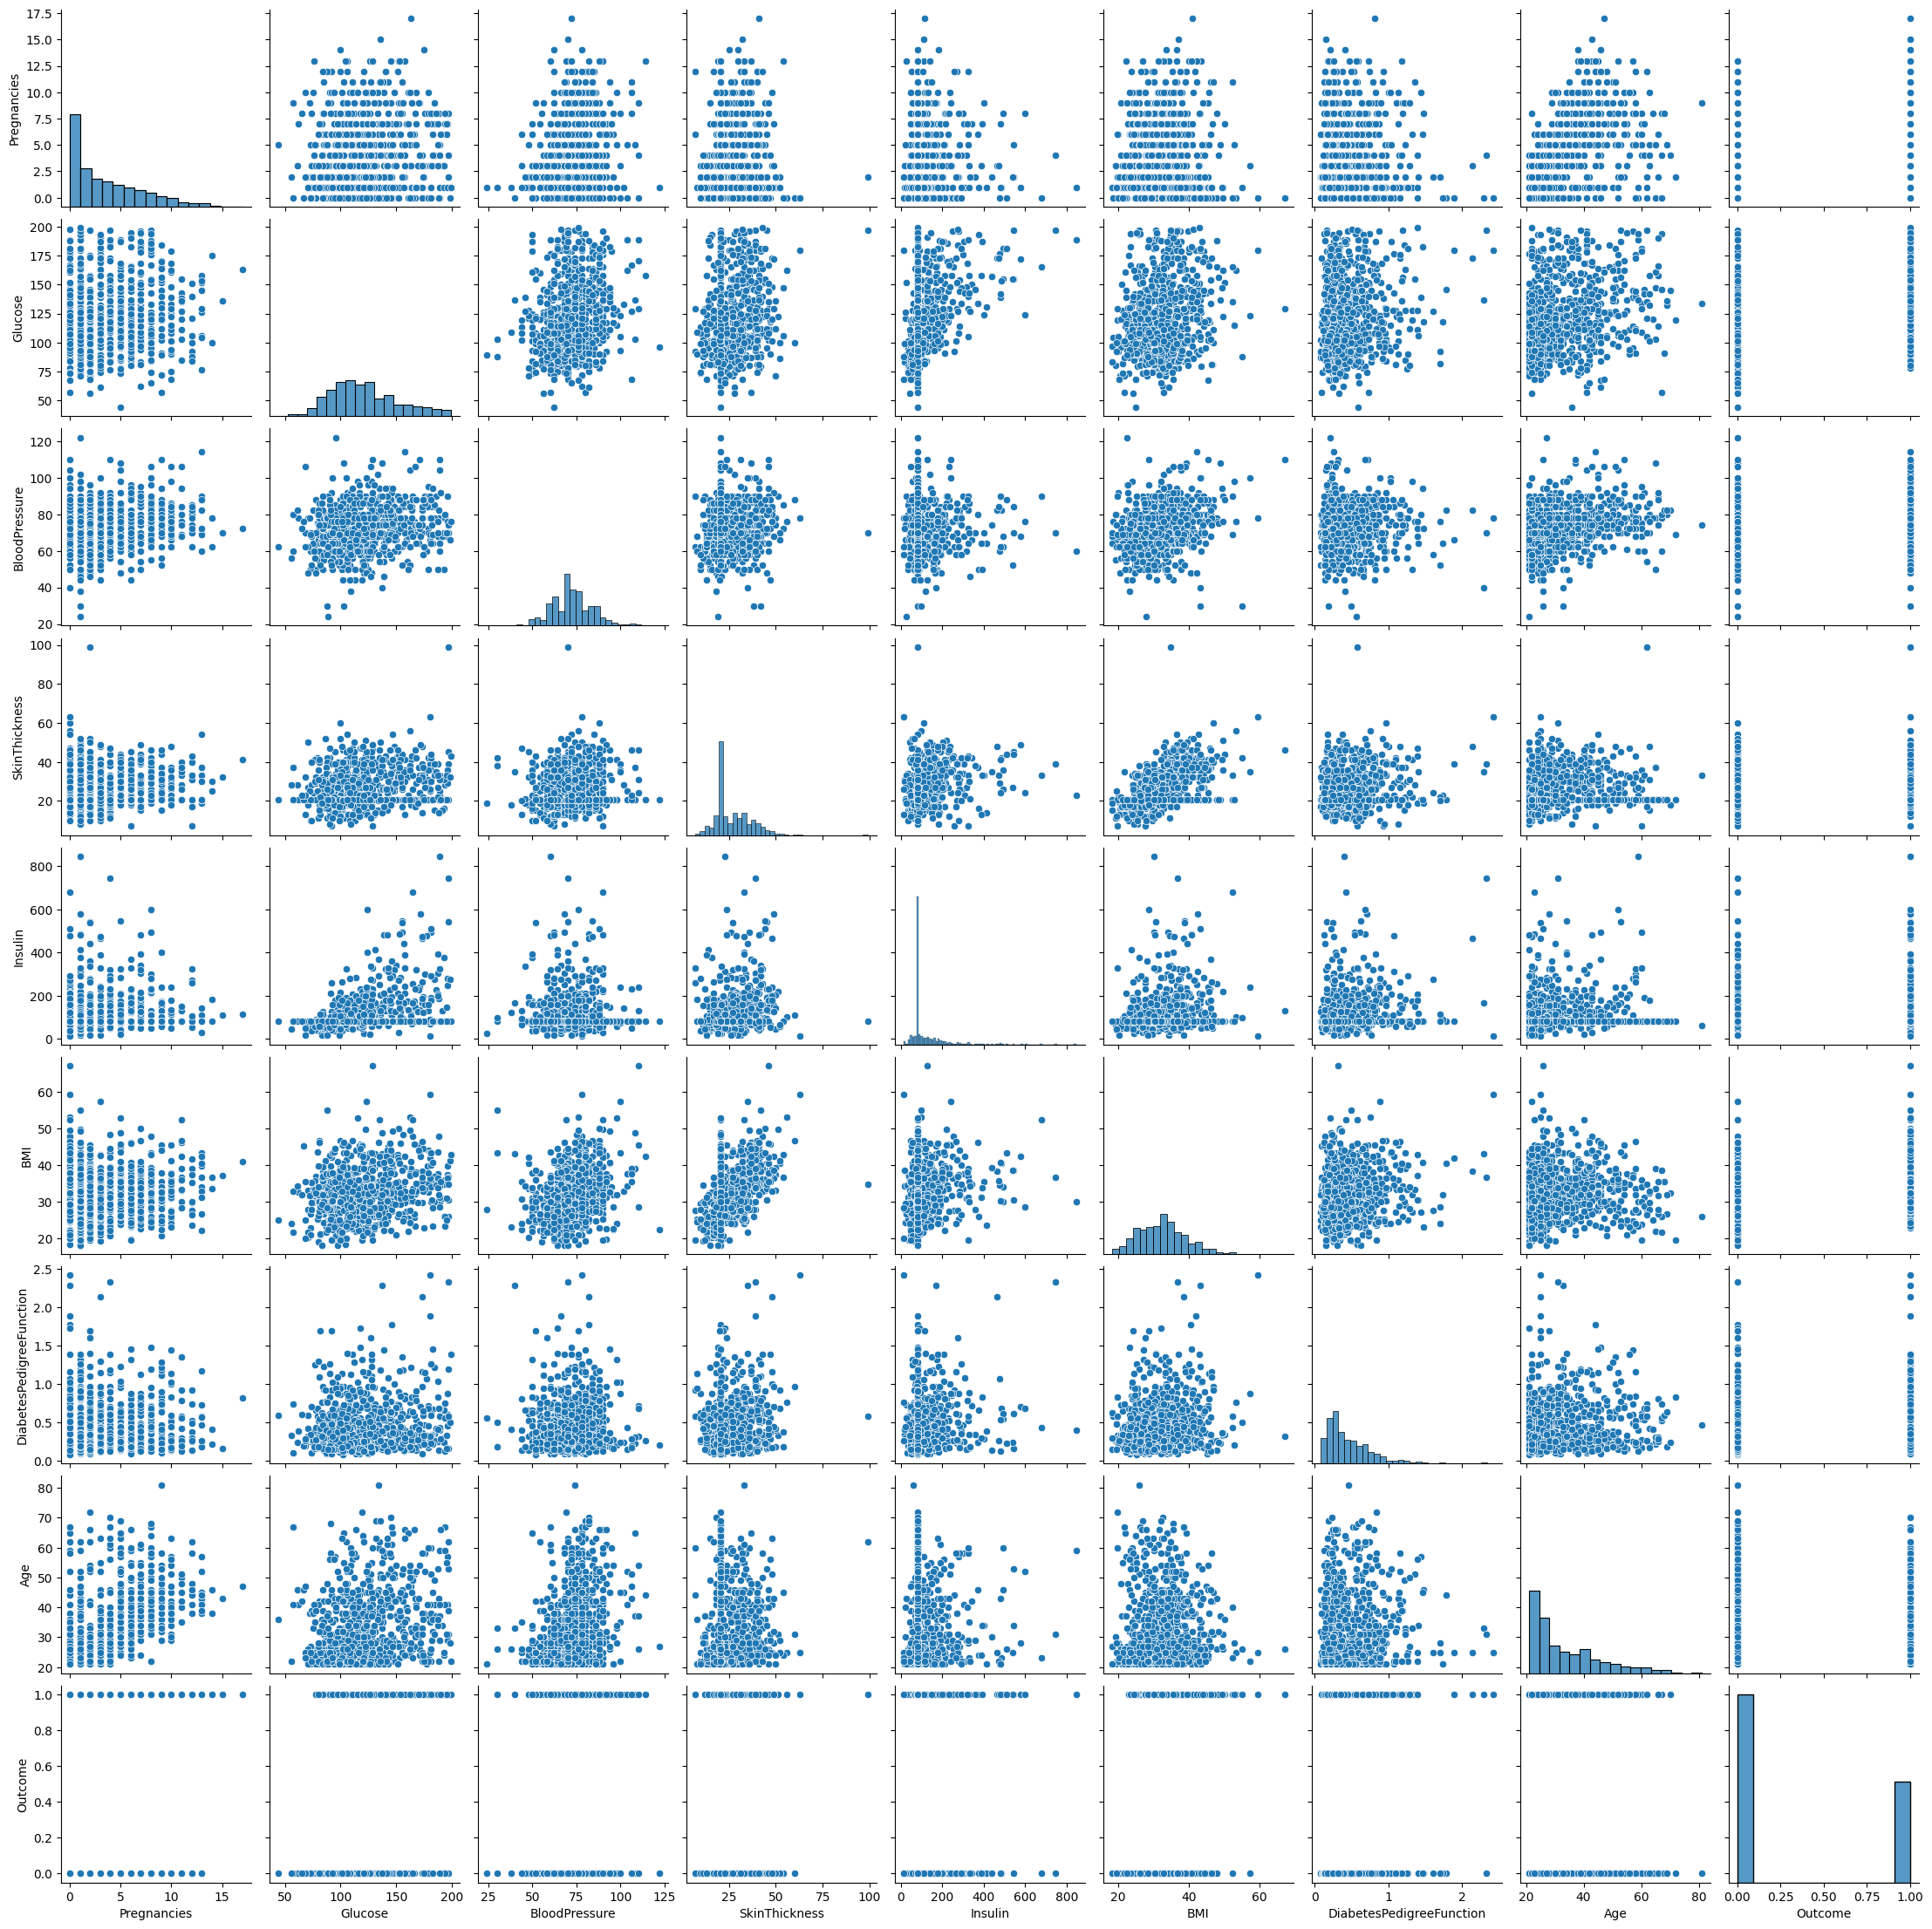

In [16]:
sns.pairplot(data=df)

<Axes: >

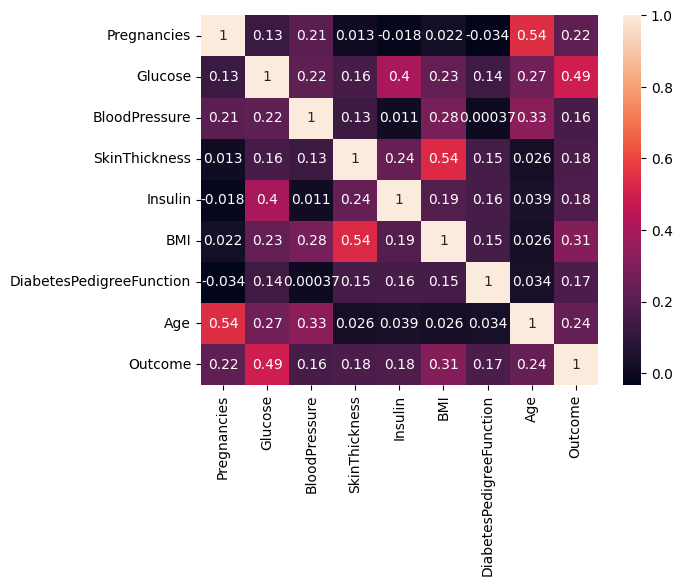

In [22]:
sns.heatmap(df.corr(),annot=True)

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.
Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.
Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [23]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [25]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [28]:
dt=DecisionTreeClassifier()

In [29]:
dt.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [30]:
y_pred=dt.predict(x_test_scaled)

In [31]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[84 39]
 [28 41]]
0.6510416666666666
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       123
           1       0.51      0.59      0.55        69

    accuracy                           0.65       192
   macro avg       0.63      0.64      0.63       192
weighted avg       0.66      0.65      0.66       192



In [33]:
parameters={'criterion':('gini', 'entropy', 'log_loss'),'splitter':('best', 'random'),'max_depth':[1,2,3,10,12,16]}
gt=GridSearchCV(dt,param_grid=parameters,cv=5)

In [34]:
gt.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [1, 2, 3, 10, 12, 16],
                         'splitter': ('best', 'random')})

In [35]:
gt.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}

In [36]:
gt.best_score_

0.7482608695652174

In [37]:
y_pred_gt=gt.predict(x_test_scaled)

In [39]:
print(confusion_matrix(y_test,y_pred_gt))
print(accuracy_score(y_test,y_pred_gt))
print(classification_report(y_test,y_pred_gt))

[[105  18]
 [ 36  33]]
0.71875
              precision    recall  f1-score   support

           0       0.74      0.85      0.80       123
           1       0.65      0.48      0.55        69

    accuracy                           0.72       192
   macro avg       0.70      0.67      0.67       192
weighted avg       0.71      0.72      0.71       192



Accuracy: 0.71875
Precision: 0.7095979349186483
Recall: 0.71875
F1 Score: 0.7072443181818181
Confusion Matrix:
[[105  18]
 [ 36  33]]


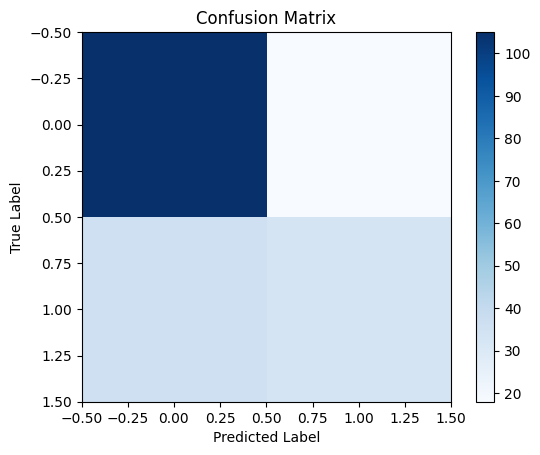

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_gt)
precision = precision_score(y_test, y_pred_gt, average='weighted')
recall = recall_score(y_test, y_pred_gt, average='weighted')
f1 = f1_score(y_test, y_pred_gt, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gt)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


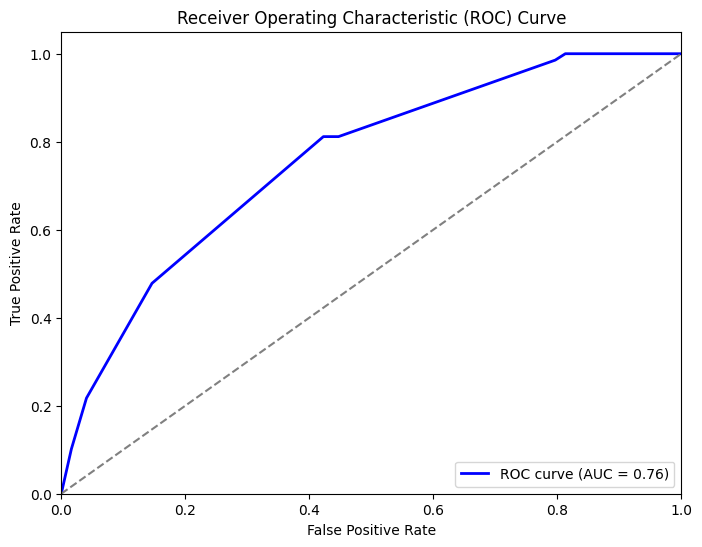

In [47]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Predict probabilities for the positive class (class 1)
y_prob = gt.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.
Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset

[Text(0.5541025060386473, 0.96875, 'x[1] <= 0.725\ngini = 0.452\nsamples = 576\nvalue = [377, 199]'),
 Text(0.2905721618357488, 0.90625, 'x[7] <= -0.385\ngini = 0.36\nsamples = 454\nvalue = [347, 107]'),
 Text(0.17753623188405798, 0.84375, 'x[1] <= 0.193\ngini = 0.208\nsamples = 246\nvalue = [217, 29]'),
 Text(0.0893719806763285, 0.78125, 'x[5] <= 2.442\ngini = 0.134\nsamples = 208\nvalue = [193, 15]'),
 Text(0.07971014492753623, 0.71875, 'x[5] <= -0.009\ngini = 0.118\nsamples = 206\nvalue = [193, 13]'),
 Text(0.028985507246376812, 0.65625, 'x[0] <= -0.376\ngini = 0.031\nsamples = 129\nvalue = [127, 2]'),
 Text(0.01932367149758454, 0.59375, 'gini = 0.0\nsamples = 97\nvalue = [97, 0]'),
 Text(0.03864734299516908, 0.59375, 'x[4] <= -0.742\ngini = 0.117\nsamples = 32\nvalue = [30, 2]'),
 Text(0.01932367149758454, 0.53125, 'x[1] <= -0.423\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.00966183574879227, 0.46875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.028985507246376812, 0

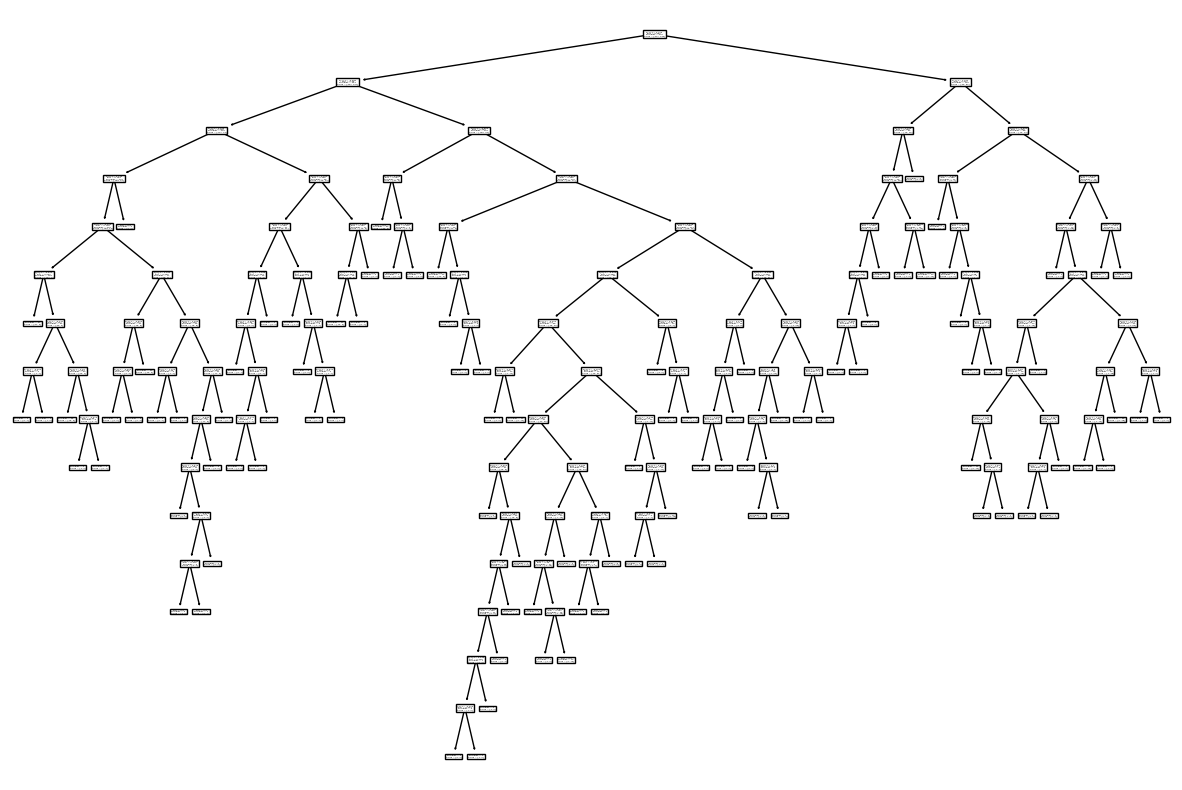

In [50]:
from sklearn.tree import plot_tree 
plt.figure(figsize=(15,10))
plot_tree(dt)

In [53]:
Pregnancies=0.001
Glucose=20.22
BloodPressure=110
SkinThickness=10
Insulin=0.1111
BMI=12.22
DiabetesPedigreeFunction=111
Age=12
new_data=scaler.transform([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])
predict=gt.predict(new_data)
print(predict)

       
       

[0]


C:\Users\Goutham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
